In [1]:
# Module Imports
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
cluster = LocalCluster() 
cluster.scale(8) 

# Sets the number of workers 
cluster.adapt(minimum=1, maximum=8) 

# Allows the cluster to auto scale to 10 when tasks are computed 
client = Client(cluster)

In [3]:
defined_dtypes = {'id': str, 'title': str, 'comments':  str, 'journal-ref':  str, 'journal-ref_cleaned':  str,
                  'categories':  str, 'categories_original':str, "journal-ref_original":str,
                  'feild':str, 'category':str, 'sub_category':str}

df = dd.read_csv('without_covid_cleaned.csv', blocksize="256 MiB", dtype=defined_dtypes)
df.head(5)

2023-05-29 12:01:58,286 - distributed.nanny - WARNING - Worker process still alive after 3.199997711181641 seconds, killing
2023-05-29 12:01:58,289 - distributed.nanny - WARNING - Worker process still alive after 3.1999983215332035 seconds, killing
2023-05-29 12:01:58,290 - distributed.nanny - WARNING - Worker process still alive after 3.1999986267089846 seconds, killing
2023-05-29 12:01:58,291 - distributed.nanny - WARNING - Worker process still alive after 3.1999987792968754 seconds, killing
2023-05-29 12:01:58,292 - distributed.nanny - WARNING - Worker process still alive after 3.1999983215332035 seconds, killing
2023-05-29 12:01:58,293 - distributed.nanny - WARNING - Worker process still alive after 3.1999986267089846 seconds, killing
2023-05-29 12:01:58,295 - distributed.nanny - WARNING - Worker process still alive after 3.1999989318847657 seconds, killing


,id,title,comments,journal-ref_original,categories_original,journal-ref_cleaned,first_category,category,sub_category,feild
0,0704.0001,calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","phys.rev.d76:013009,2007",hep-ph,physics.review,hep-ph,hep-ph,NaN,physics
1,0704.0002,sparsity-certifying graph decompositions,to appear in graphs and combinatorics,NaN,math.co cs.cg,NaN,math.co,math,co,math
2,0704.0003,the evolution of the earth-moon system based o...,"23 pages, 3 figures",NaN,physics.gen-ph,NaN,physics.gen-ph,physics,gen-ph,physics
3,0704.0004,a determinant of stirling cycle numbers counts...,11 pages,NaN,math.co,NaN,math.co,math,co,math
4,0704.0006,bosonic characters of atomic cooper pairs acro...,"6 pages, 4 figures, accepted by pra",NaN,cond-mat.mes-hall,NaN,cond-mat.mes-hall,cond-mat,mes-hall,physics


In [17]:
rainbow_big = ['red', 'orange', 'gold', 'yellow','palegreen', 'green', 'greenyellow', 'blue', 'skyblue', 
               'pink', 'plum', 'purple', 'peru']

# Title

**Length of title**

In [11]:
length_of_titles = df['title'].str.len()
length_of_titles_computed = length_of_titles.compute()

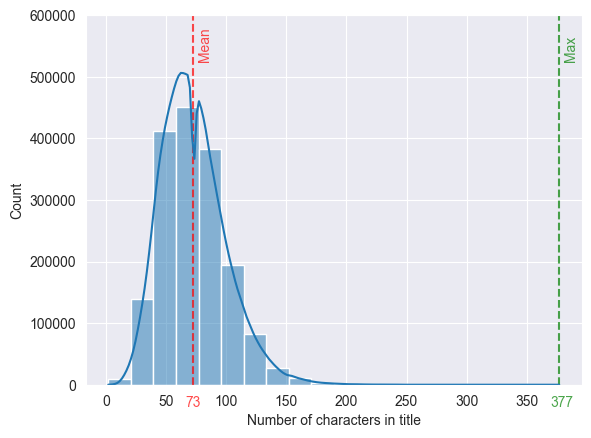

In [5]:
sns.set_style("darkgrid")

# Creating variables to align mean and max value annotations
text_offset = 4
no_offset = 7
no_y_cood = -35000

# Plotting the line and annotations showing the mean
mean = length_of_titles_computed.mean()
plt.axvline(mean, color='r', linestyle='--', label="Mean", alpha=0.7)
plt.text(mean+text_offset, 530000, 'Mean',rotation=90, color='r',alpha=0.7, 
         fontsize=10)
plt.text(mean-no_offset, no_y_cood, str(round(mean)), color='r', alpha=0.7, 
         fontsize=10)

# Plotting the line and annotations showing the maximum value
max_char = length_of_titles_computed.max()
plt.axvline(max_char, color='g', linestyle='--', label="Max",alpha=0.7)
plt.text(max_char+text_offset, 530000, 'Max', rotation=90, color='g', 
         alpha=0.7, fontsize=10)
plt.text(max_char-no_offset, no_y_cood, str(round(max_char)), color='g', 
         alpha=0.7, fontsize=10)

# Plotting the histogram and kde
sns.histplot(data=length_of_titles_computed, kde=True, bins=20)
plt.xlabel('Number of characters in title')
plt.ylim(0, 600000)
plt.show()

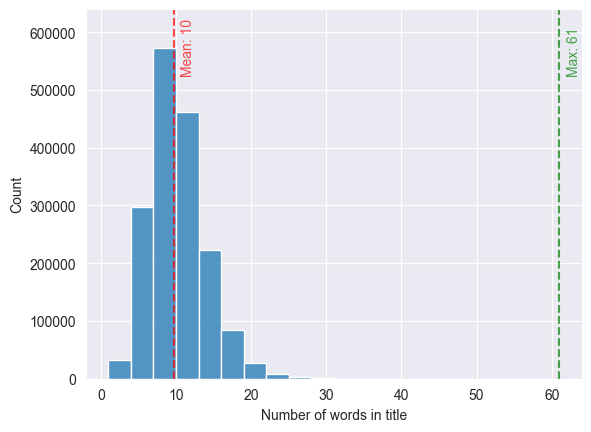

In [6]:
# Calculating the number of words in each title
word_count = df['title'].str.split().str.len()
word_count = word_count.compute()

sns.set_style("darkgrid")

# Creating variables to align mean and max value annotations
text_offset = 1

# Plotting the line and annotations showing the mean
mean = word_count.mean()
plt.axvline(mean, color='r', linestyle='--', label="Mean", alpha=0.7)
plt.text(mean+text_offset, 530000, 'Mean: '+str(round(mean)),rotation=90, color='r',alpha=0.7, 
         fontsize=10)

# Plotting the line and annotations showing the maximum value
max_char = word_count.max()
plt.axvline(max_char, color='g', linestyle='--', label="Max",alpha=0.7)
plt.text(max_char+text_offset, 530000, 'Max: '+str(max_char), rotation=90, color='g', alpha=0.7, 
         fontsize=10)

# Plotting the histogram
sns.histplot(data=word_count, bins=20)
plt.xlabel('Number of words in title')
plt.ylim(0, 640000)
plt.show()

In [18]:
long_titles = df[df['title'].str.split().str.len()>45].compute()

In [19]:
for title in long_titles['title']:
    print(title)
    print()

investigation of the 2-body system with a rotating central body (e. g.  earth-moon system) within the projective unified field theory: the transfer  of rotational angular momentum and energy from the central body to the  orbital 2-body system, the tidal and the non-tidal influences (mechanical,  general-relativistic lense-thirring effect and cosmological  puft-contributions)

on the 5d extra-force according to basini-capozziello-leon formalism and  five important features: kar-sinha gravitational bending of light,  chung-freese superluminal behaviour, maartens-clarkson black strings,  experimental measures of extra dimensions on board international space  station(iss) and the existence of the particle $z$ due to a higher  dimensional spacetime

an assessment of the measurement of the lense-thirring effect in the  earth gravity field, in reply to: ``on the measurement of the lense-thirring  effect using the nodes of the lageos satellites, in reply to ``on the  reliability of the so far 

In [12]:
import pandas as pd

word_legth_dd = pd.DataFrame()

# Replace underscores with spaces
df['title'] = df['title'].str.replace('_', ' ')

word_legth_dd['word'] = df['title'].str.split().explode()

# Remove words including numbers and special characters
word_legth_dd = word_legth_dd[~word_legth_dd['word'].str.contains('[\d\W]', regex=True)]


word_legth_dd['word_length'] = word_legth_dd['word'].str.len()


In [13]:
word_legth_dd = word_legth_dd.drop_duplicates(subset='word', keep="first")

In [7]:
word_legth_dd[word_legth_dd['word_length']>25].sort_values('word_length', ascending=False)

,word,word_length
12845592,pflanzenschutzmittelregistrierungsdaten,39
10201855,quanteninformationsverarbeitung,31
14381988,dimyristoylphosphatidylcholine,30
16539492,dipalmitoylphosphatidylcholine,30
12910689,stereoelectroencephalographic,29
3841317,pseudodifferentialoperatoren,28
4448050,bildverarbeitungsalgorithmen,28
75513,vertexoperatorsuperalgebren,27
2154018,metallotetrabenzoporphyrins,27
8697009,electromechanophysiological,27


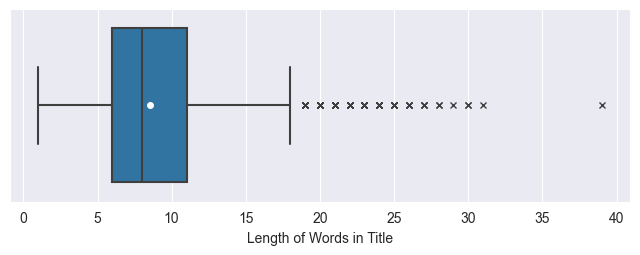

In [14]:
plt.figure(figsize=(8,2.5))

sns.set_style("darkgrid")

word_len_data = word_legth_dd['word_length']

sns.boxplot(x=word_len_data, showmeans=True,
            
            flierprops={"marker": "x"}, 
           
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'white',
                       'markersize':'4'}
           
            )

plt.xlabel('Length of Words in Title')
#plt.ylim(0, 4000000)
plt.show()

In [15]:
np.mean(word_len_data)

8.525837242229564

In [16]:
np.median(word_len_data)

8.0

# Comments

In [8]:
df['comments'].head(15)

0               37 pages, 15 figures; published version
1                 to appear in graphs and combinatorics
2                                   23 pages, 3 figures
3                                              11 pages
4                   6 pages, 4 figures, accepted by pra
5     16 pages, no figures. typos corrected to match...
6                                     minor corrections
7                                  36 pages, 17 figures
8     14 pages; title changed; to appear in experime...
9                                    18 pages, 1 figure
10    22 pages; signs and coefficients adjusted for ...
11                      17 pages, 3 figures and 1 table
12    10 pages, 11 figures (figures 3, 4, 7 and 8 at...
13    20 pages, v2: an overall sign and typos corrected
14                           6 pages, journal-ref added
Name: comments, dtype: object

In [25]:
from wordcloud import WordCloud

comments  = df['comments'].compute()

In [26]:
# Create an object for each word in the comment
comments_series = comments.str.split()
# Create series with a new element for each word
comments_series  = comments_series.explode()
# Remove words that contain numbers or special characters
comments_series = comments_series[~comments_series.str.contains('[\d\W]', regex=True)]

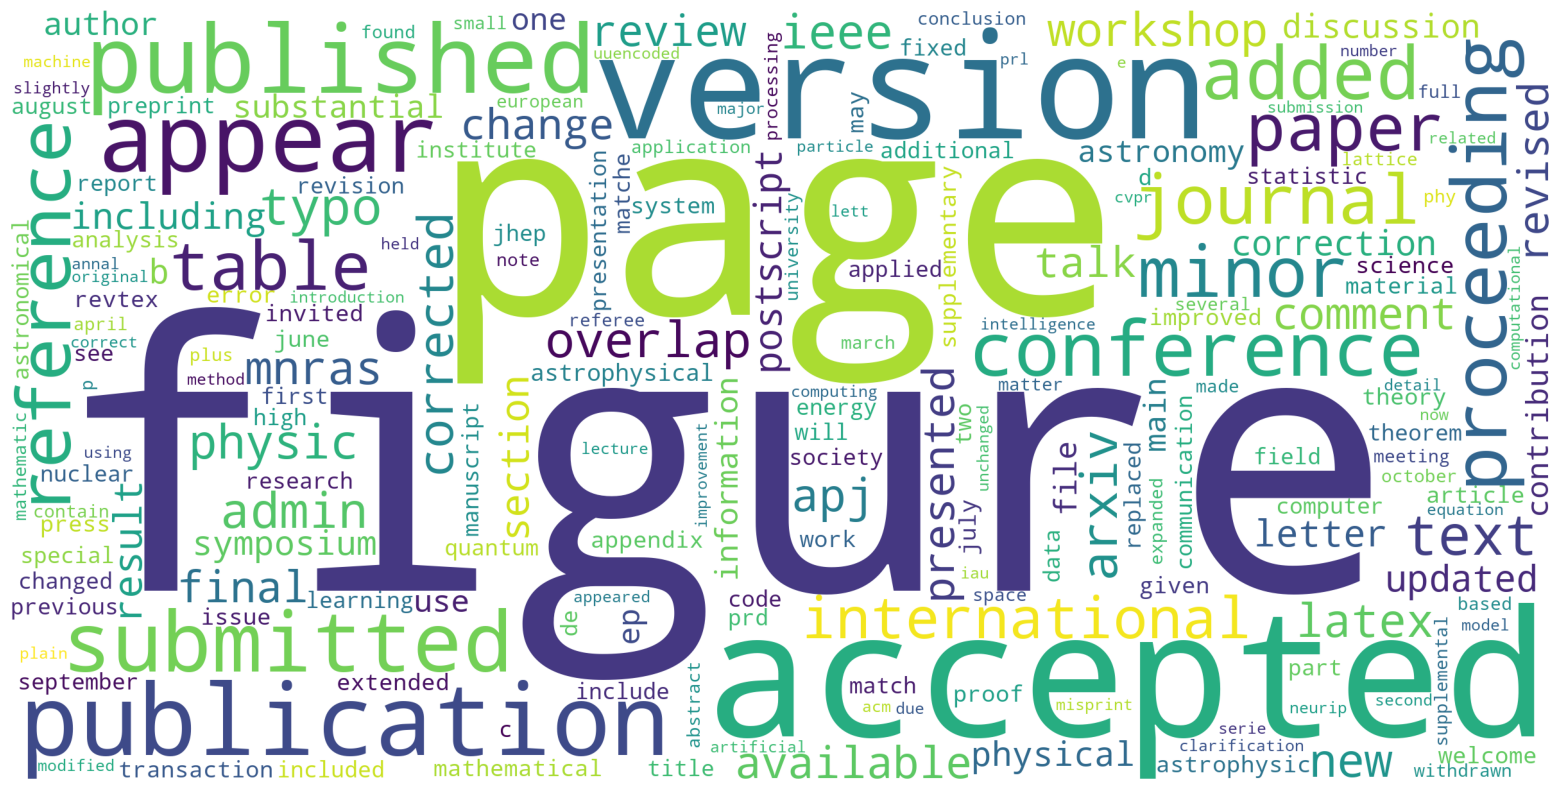

In [28]:
plt.figure(figsize=(20,10))

# prepare data for wordcloud by joining into a continuous string
comments_for_wordcloud = ' '.join(list(comments_series))

# make wordcloud
wordcloud = WordCloud(background_color='white', collocations=False, width=2400, 
                      height=1200).generate(comments_for_wordcloud)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
s.str.count('a')

In [46]:
total = len(comments)
total

1714032

In [61]:
all_items = df.index.compute()

Dask Index Structure:
npartitions=1
    int64
      ...
dtype: int64
Dask Name: assign-index, 5 graph layers

In [84]:
((~comments.str.contains('(pages|figure|version)', regex=True)).sum()/total)*100

C:\Users\gv9\AppData\Local\Temp\ipykernel_16140\1818385364.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (~comments.str.contains('(pages|figure|version)', regex=True)).sum()/total


0.186109127484201

In [91]:
contianing_none = round(((~comments.str.contains('(pages|figure|version)', regex=True)).sum()/total)*100, 1)

C:\Users\gv9\AppData\Local\Temp\ipykernel_16140\4250573547.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  round(((~comments.str.contains('(pages|figure|version)', regex=True)).sum()/total)*100, 1)


18.6

C:\Users\gv9\AppData\Local\Temp\ipykernel_16140\3305062465.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  contianing_none = round(((~comments.str.contains('(pages|figure|version)', regex=True)).sum()/total)*100, 1)


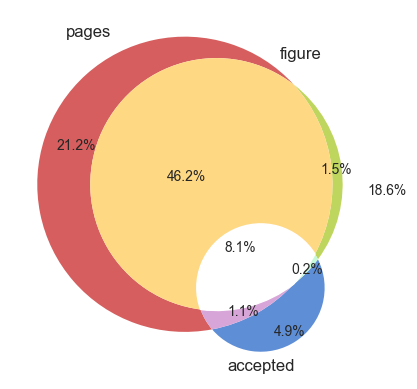

In [93]:
total = len(comments)
# Find percentage of comments containing none of the top words
contianing_none = round(((~comments.str.contains('(pages|figure|version)', 
                                                 regex=True)).sum()/total)*100, 1)

# Find comments containing each word and make a series for each
venn = pd.DataFrame()
venn['pages'] = comments.str.contains('pages')
venn['figure'] = comments.str.contains('figure')
venn['accepted'] = comments.str.contains('accepted')

# Convert each series into a set of the indecies marked True
set_pages = set(venn['pages'][venn['pages']].index)
set_figure = set(venn['figure'][venn['figure']].index)
set_accepted = set(venn['accepted'][venn['accepted']].index)

# Make Venn diagram
v = venn3([set_pages, set_figure, set_accepted], 
      ('pages', 'figure', 'accepted'),
     subset_label_formatter=lambda x: f"{(x/total):0.1%}",
     set_colors=('#d65e5e', '#bed65e', '#5e8ed6'), alpha=1)

v.get_patch_by_id('111').set_color('white')

plt.annotate(str(contianing_none)+'%', (0.6, 0))
plt.show()

# Journal Ref

**Number of papers with vs without a journal ref**

In [17]:
df.dropna(subset=['journal-ref_original'])[["journal-ref_original", 'journal-ref_cleaned']].compute()

,journal-ref_original,journal-ref_cleaned
0,"phys.rev.d76:013009,2007",physics.review
5,"phys.rev.d76:044016,2007",physics.review
6,"journal of applied physics, vol 104, 073536 (2...",journal.of.applied.physics
10,"jhep 0705:034,2007",jhep
11,"commun.theor.phys.49:993-1000,2008",commun.theor.physics
...,...,...
1714020,siam j appl math {\bf 58} (1998) 103--121,siam.journal.of.appl.math.bf
1714022,"phys. rev. b 55, 6035 (1997)",physics.review
1714023,phys rev b 56: (2) 809-825 jul 1 1997,physics.review
1714024,"phys. rev. lett. 79, 1726 (1997)",physics.review


In [18]:
journal_ref = df['journal-ref_cleaned']
journal_ref_computed = journal_ref.compute()

In [19]:
journal_ref_computed.value_counts()

journal-ref_cleaned
physics.review                                                                                                                        201252
physics.lett                                                                                                                           23472
jhep                                                                                                                                   19225
nucl.physics                                                                                                                           14229
astrophys.journal.of                                                                                                                   13758
                                                                                                                                       ...  
international.journal.for.infonomics.iji.issues.issn                                                                                  

<Axes: xlabel='count', ylabel='Count'>

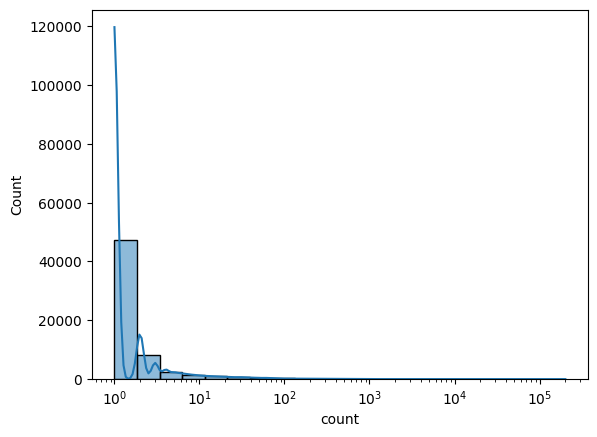

2023-05-29 17:49:46,662 - distributed.scheduler - WARNING - Worker failed to heartbeat within 300 seconds. Closing: <WorkerState 'tcp://127.0.0.1:64749', name: 0, status: running, memory: 0, processing: 0>
2023-05-29 17:49:46,688 - distributed.scheduler - WARNING - Received heartbeat from unregistered worker 'tcp://127.0.0.1:64749'.


In [9]:
sns.histplot(data=journal_ref_computed.value_counts(), kde=True, bins=20, log_scale=(True, False))

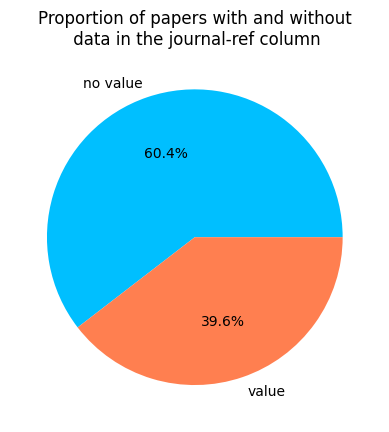

In [12]:
no_nans = journal_ref_computed.isna().sum()
no_values = journal_ref_computed.notna().sum()

plt.pie(np.array([no_nans, no_values]), 
        labels=['no value', 'value'],
       colors = ['deepskyblue', 'coral'],
        autopct='%1.1f%%'
       )
plt.title('Proportion of papers with and without\n data in the journal-ref column')
plt.show()

**Most populate journal ref for papers that have one**

In [13]:
journal_ref_values = journal_ref_computed[journal_ref_computed.notna()]
journal_ref_values.head(5)

0                 physics.review
5                 physics.review
6     journal.of.applied.physics
10                          jhep
11          commun.theor.physics
Name: journal-ref_cleaned, dtype: object

In [14]:
value_counts = journal_ref_values.value_counts()

mean: 10.9148836834903
mode: 1
median: 1.0


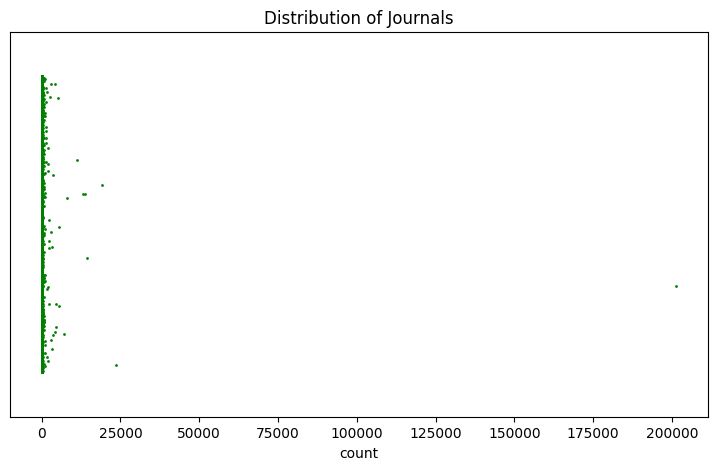

In [15]:
print('mean:', value_counts.mean())
print('mode:', value_counts.mode()[0])
print('median:', value_counts.median())

value_counts = journal_ref_values.value_counts()

plt.figure(figsize=(9, 5))
sns.stripplot(value_counts, orient='h', size=2, alpha=1, color='green')

plt.title("Distribution of Journals")

plt.tick_params(left=False) 
plt.ylim(-0.13, 0.13)
plt.show()

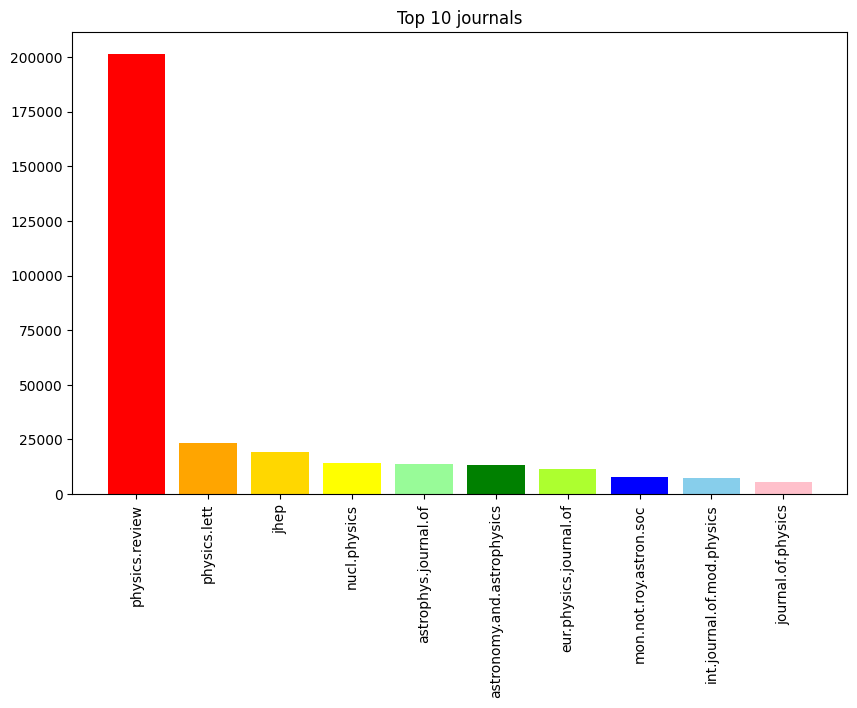

In [18]:
plt.figure(figsize=(10,6))

selection = value_counts[:10]

plt.bar(selection.index, selection, color=rainbow_big)
plt.title("Top 10 journals")
plt.xticks(rotation=90)
plt.show()

In [19]:
only_1 = len([num for num in value_counts if num==1])
less_than_10 = len([num for num in value_counts if num>1 and num<=10])
less_than_100 = len([num for num in value_counts if num>10 and num<=100])
greater_than_100 = len([num for num in value_counts if num>100])

data = np.array([only_1, less_than_10, less_than_100, greater_than_100])


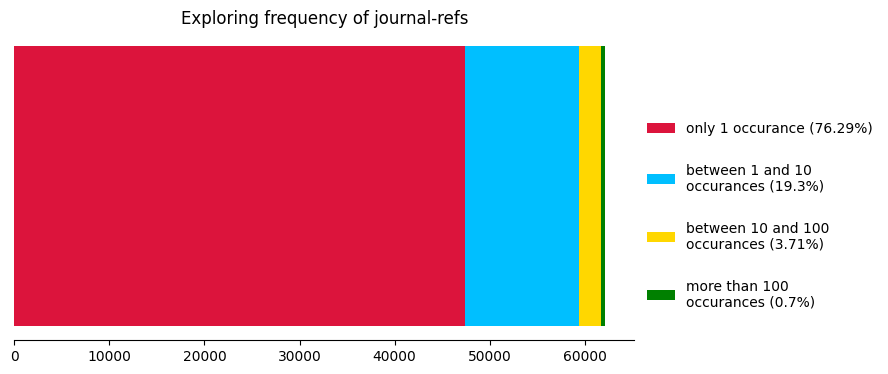

In [66]:
# preparing data
only_1 = len([num for num in value_counts if num==1])
less_than_10 = len([num for num in value_counts if num>1 and num<=10])
less_than_100 = len([num for num in value_counts if num>10 and num<=100])
greater_than_100 = len([num for num in value_counts if num>100])

data = np.array([only_1, less_than_10, less_than_100, greater_than_100])
perc = [round(i/sum(data)*100, 2) for i in data]

# Plotting Stacked Bar Chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(1, data[0], color='crimson')
ax.barh(1, data[1], left=data[0], color='deepskyblue')
ax.barh(1, data[2], left=data[0]+data[1], color='gold')
ax.barh(1, data[3], left=data[0]+data[1]+data[2], color='g')

ax.legend(labels=[f'only 1 occurance ({perc[0]}%)', 
                  f'between 1 and 10\noccurances ({perc[1]}%)', 
                  f'between 10 and 100\noccurances ({perc[2]}%)',
                  f'more than 100\noccurances ({perc[3]}%)'],
                  bbox_to_anchor=(1, 0.75), frameon=False,
                  labelspacing = 2)

ax.set_title('Exploring frequency of journal-refs')
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.yaxis.set_tick_params(labelleft=False, tick1On=False)

plt.show()

In [178]:
all_less_than_100 = len([num for num in value_counts if num<=10]) 
all_less_than_100/total*100

54.22423949077161

# Categories

In [111]:
df[['categories_original', 'feild','category','sub_category']].head(20)


,categories_original,feild,category,sub_category
0,hep-ph,physics,hep-ph,NaN
1,math.co cs.cg,math,math,co
2,physics.gen-ph,physics,physics,gen-ph
3,math.co,math,math,co
4,cond-mat.mes-hall,physics,cond-mat,mes-hall
5,gr-qc,physics,gr-qc,NaN
6,cond-mat.mtrl-sci,physics,cond-mat,mtrl-sci
7,math.co,math,math,co
8,math.nt math.ag,math,math,nt
9,math.ca math.at,math,math,ca


In [68]:
orig_categories = df['categories_original'].compute()

In [69]:
no_categories = pd.Series([len(item.split()) for item in orig_categories])

In [70]:
value_counts

journal-ref_cleaned
physics.review                                                                                                                        201252
physics.lett                                                                                                                           23472
jhep                                                                                                                                   19225
nucl.physics                                                                                                                           14229
astrophys.journal.of                                                                                                                   13758
                                                                                                                                       ...  
international.journal.for.infonomics.iji.issues.issn                                                                                  

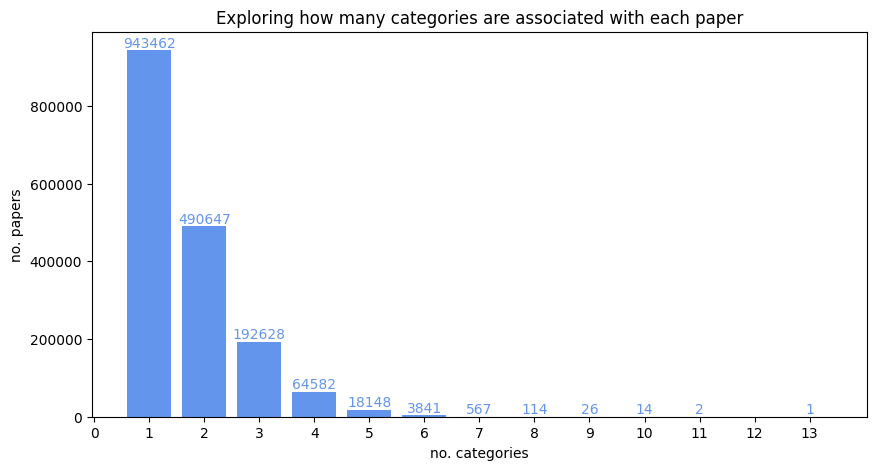

In [71]:
# calculate value counts
orig_categories = df['categories_original'].compute()
# split based on space
no_categories = pd.Series([len(item.split()) for item in orig_categories])
value_counts = no_categories.value_counts()

# plot bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(value_counts.index, value_counts, width=0.8, color='cornflowerblue')
# add value labels to bars
ax.bar_label(bars, color='cornflowerblue')

plt.xticks(np.arange(0, 14, 1))
plt.title('Exploring how many categories are associated with each paper')
plt.xlabel('no. categories')
plt.ylabel('no. papers')
plt.show()

**Popularity of categories**

**Popularity of category prefixes**

**Feild**

In [72]:
colors_dict = {'physics':'red',
         'math':'orange',
         'computer science':'yellow',
         'quantative biology':'green',
         'quantative finance':'blue',
         'statistics':'pink',
         'electrical engineering and systems science':'brown',
         'economics':'purple'}

In [77]:
pie_data = df['feild'].value_counts().compute()

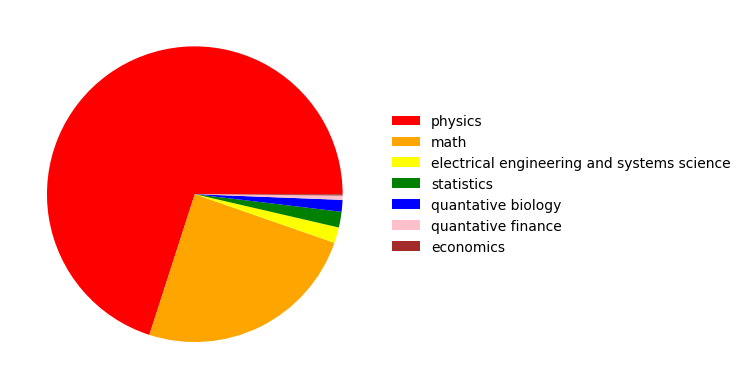

In [73]:
plt.pie(pie_data, labels=None, colors={v: k for k, v in colors_dict.items()})
plt.legend(labels=pie_data.index, bbox_to_anchor=(1, 0.75), frameon=False)
plt.show()

In [166]:
rainbow_small = ['red','orange','gold','green','deepskyblue','pink','purple']

pie_data_lables = pie_data.index.to_list()
print(pie_data_lables)
pie_data_lables[2] = 'eess'
pie_data_lables

['physics', 'math', 'electrical engineering and systems science', 'statistics', 'quantative biology', 'quantative finance', 'economics']


['physics',
 'math',
 'eess',
 'statistics',
 'quantative biology',
 'quantative finance',
 'economics']

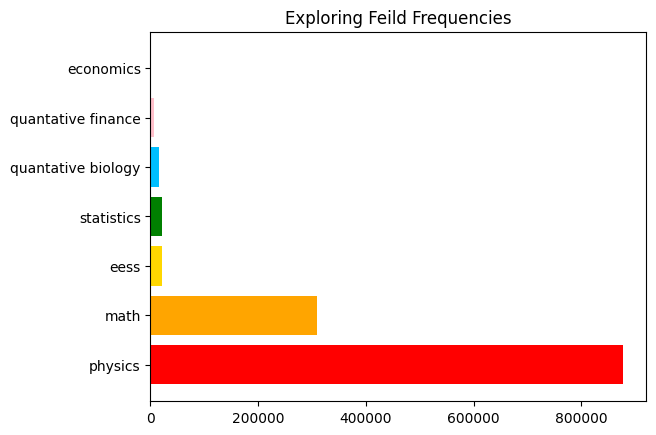

In [167]:
plt.barh(pie_data_lables, pie_data, color=rainbow_small)
plt.title('Exploring Feild Frequencies')
plt.show()

**Categories within Physics**

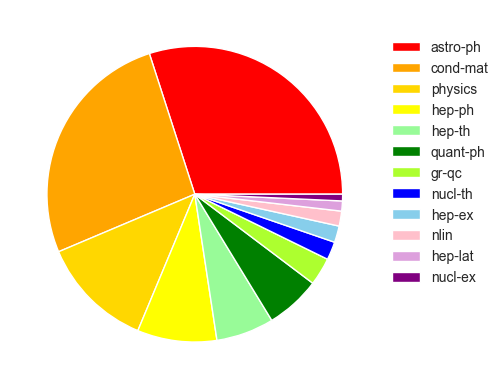

In [29]:
rainbow_big = ['red', 'orange', 'gold', 'yellow','palegreen', 'green', 'greenyellow', 'blue', 'skyblue', 
               'pink', 'plum', 'purple', 'peru']

pie_data = df[df['feild']=='physics']['category'].value_counts()
plt.pie(pie_data, labels=None, colors=rainbow_big)
plt.legend(labels=pie_data.index, bbox_to_anchor=(1, 0.95), frameon=False)
plt.show()

In [120]:
df['category'] = df['category'].str.split(' ').str[0]

phys_category_data = df[df['feild']=='physics']['category'].value_counts().compute()
other_category_data = df[df['feild']!='physics']['feild'].value_counts().compute()

display(phys_category_data)
display(other_category_data)

category
astro-ph    262823
cond-mat    231382
physics     108248
hep-ph       76222
hep-th       55426
quant-ph     52537
gr-qc        26649
nucl-th      17375
hep-ex       15831
nlin         14300
hep-lat       9668
nucl-ex       6385
Name: count, dtype: int64

feild
math                                          308446
electrical engineering and systems science     21529
statistics                                     21466
quantative biology                             16178
quantative finance                              5823
economics                                       1829
Name: count, dtype: int64

In [132]:
other_category_dataa = other_category_data.index.to_list()
other_category_dataa[1] = 'eess'
other_category_dataa

['math',
 'eess',
 'statistics',
 'quantative biology',
 'quantative finance',
 'economics']

In [146]:
other_category_data

feild
math                                          308446
electrical engineering and systems science     21529
statistics                                     21466
quantative biology                             16178
quantative finance                              5823
economics                                       1829
Name: count, dtype: int64

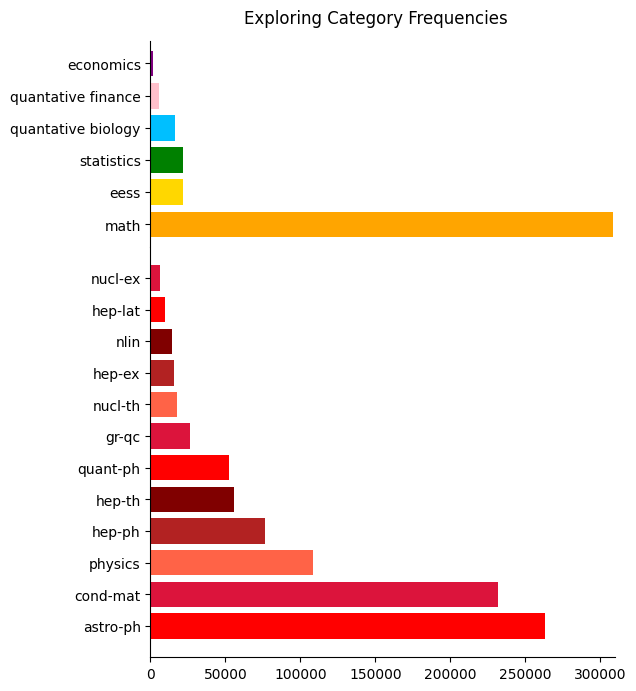

In [164]:
# Prepare data
phys_category_data = df[df['feild']=='physics']['category'].value_counts().compute()
other_category_data = df[df['feild']!='physics']['category'].value_counts().compute()

# Prepare Plot
fig, (ax1, ax2) = plt.subplots(2, figsize=(6, 8),
                        gridspec_kw={'height_ratios': [1, 2]})

fig.suptitle('Exploring Category Frequencies', x=0.5, y=0.92)
fig.subplots_adjust(hspace=0)

# Plot other categories
ax1.barh(other_category_dataa, other_category_data, color=rainbow_small[1:])
ax1.set(xticklabels=[])
ax1.tick_params(bottom=False)
ax1.set_xlim(0, 310000)
ax1.spines[['right', 'top', 'bottom']].set_visible(False)

# Plot physics categories
reds = ['red', 'crimson', 'tomato', 'firebrick', 'maroon']
ax2.barh(phys_category_data.index, phys_category_data, color=reds)
ax2.set_xlim(0, 310000)
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

In [99]:
category_data

category
math                                      308446
astro-ph                                  262823
cs                                        250861
cond-mat                                  231382
physics                                   108248
                                           ...  
nucl-ex astro-ph hep-ex hep-ph physics         1
hep-ex hep-lat hep-ph physics                  1
nucl-ex astro-ph hep-ex hep-ph                 1
nucl-ex astro-ph cond-mat nucl-th              1
hep-ph gr-qc hep-th nucl-th physics            1
Name: count, Length: 1486, dtype: int64

In [24]:
client.close()

In [193]:
df[['journal-ref_cleaned',"journal-ref_original"]]

KeyError: "None of [Index(['journal-ref_cleaned', 'journal-ref_original'], dtype='object')] are in the [columns]"

In [194]:
df

,count
single occurance,47386
less than 10 occurances,59157
10-100 occurances,2521
more than 100 occurances,435
